## 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [15]:
# 行是样本数，列是变量数
# 行是无法掌握的(取决于数据)，列是可以掌握的(取决于需要计算的特征个数)
X = x.reshape(-1, 1)
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [4]:
X[:20]

array([[1.40087424],
       [1.68837329],
       [1.35302867],
       [1.45571611],
       [1.90291591],
       [0.02540639],
       [0.8271754 ],
       [0.09762559],
       [0.19985712],
       [1.01613261],
       [0.40049508],
       [1.48830834],
       [0.38578401],
       [1.4016895 ],
       [0.58645621],
       [1.54895891],
       [0.01021768],
       [0.22571531],
       [0.22190734],
       [0.49533646]])

In [5]:
y[:20]

array([8.91412688, 8.89446981, 8.85921604, 9.04490343, 8.75831915,
       4.01914255, 6.84103696, 4.81582242, 3.68561238, 6.46344854,
       4.61756153, 8.45774339, 3.21438541, 7.98486624, 4.18885101,
       8.46060979, 4.29706975, 4.06803046, 3.58490782, 7.0558176 ])

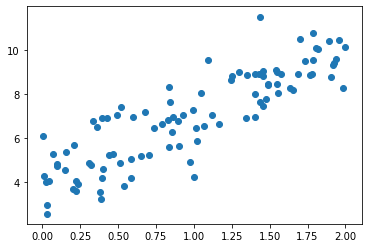

In [6]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

In [7]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [8]:
def dJ(theta, X_b, y):
    # 先开一个theta这么大的空间
    res = np.empty(len(theta))
    # 对于常数项的导数
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        # 前后两个都是向量，所以直接点乘没有问题
        # 第一个维度是数据数，所有的都需要，而i表示是第几个变量
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [9]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [16]:
X_b = np.hstack([np.ones((len(x), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [17]:
theta

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [12]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [13]:
lin_reg.coef_

array([3.00706277])

In [14]:
lin_reg.intercept_

4.021457858204859